# Time Series Forecasting with XGBoost / GBRT

In [1]:
from random import gauss
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
sys.path.insert(2,'..')
import functions
import xgboost as xgb
from sklearn import preprocessing
import annualized_rv as arv
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor # Random Forest model
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting model
from sklearn.ensemble import AdaBoostRegressor # AdaBoost model
import sklearn.ensemble as ensemble

import tensorflow as tf
from tensorflow import keras

import DataProcess

In [2]:
# reads in the historic implied vol data calculated in the dailyaverageIV notebook

aaplHistIV = pd.read_pickle('historicImpliedVolData/aapl_mean_iv_2017_2022.pkl')
googHistIV = pd.read_pickle('historicImpliedVolData/goog_mean_iv_2017_2022.pkl')
msftHistIV = pd.read_pickle('historicImpliedVolData/msft_mean_iv_2017_2022.pkl')
ndxHistIV = pd.read_pickle('historicImpliedVolData/ndx_mean_iv_2017_2022.pkl')
spyHistIV = pd.read_pickle('historicImpliedVolData/spc_mean_iv_2017_2022.pkl')




In [3]:

X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21) #preprocess spy 
X_train_reshape = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_reshape = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
#reshape data for xgboost
def reshape2d(X_train,X_test):
    X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
    return X_train,X_test

In [4]:
def modelandeval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    MSE,RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test, y_pred)
    
    return RMSE, MAE, R2, MSE

In [5]:
#XGBoost model

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.22007923279388514,
 0.17325234789176125,
 0.4787328239260459,
 0.048434868707145085)

In [6]:
#RandomForestModel
model = ensemble.RandomForestRegressor(n_estimators=100) # reccomended forest tree size
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.20002344421762105,
 0.15478308557234166,
 0.5694098865837913,
 0.04000937823667976)

In [7]:
#GBRT Model
model =ensemble.GradientBoostingRegressor()
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)


(0.20153893206186627,
 0.15324832606120298,
 0.5628603929484846,
 0.040617941136637546)

In [8]:
#AdaBoost Model
model = ensemble.AdaBoostRegressor()
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.2271707297198377,
 0.18029804138108876,
 0.44459856461035063,
 0.05160654044144355)

In [9]:
#STACKING MODEL 

estimators = [
    ('rf', ensemble.RandomForestRegressor(n_estimators=100)),
    ('gbrt', ensemble.GradientBoostingRegressor()),
    ('xgb', xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000))
]

model = ensemble.StackingRegressor(estimators=estimators, final_estimator=ensemble.RandomForestRegressor(n_estimators=100))
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.22350436140789237,
 0.1729600962060057,
 0.46238143640952833,
 0.04995419956834977)

C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.6649
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1487
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1871
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1031
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0930
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1000
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0859
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0881
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0740
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0951
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0799
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0656
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0705
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0840
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0885
Epoc

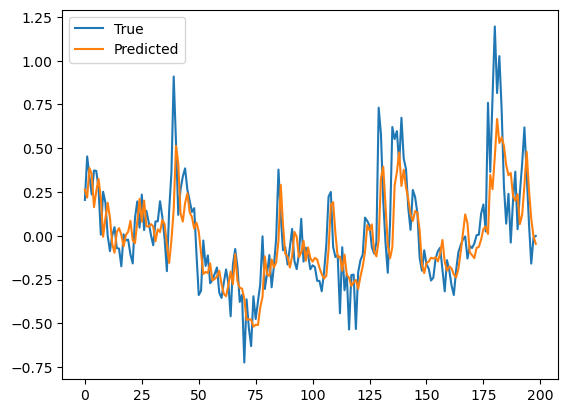

In [10]:
#LSTM Model
seq_length = 100

model = keras.models.Sequential([
    keras.layers.LSTM(seq_length, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.LSTM(seq_length),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

# pass tensors instead of numpy arrays
X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32)
y_pred = model.predict(X_test_tensor)
y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency

DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
DataProcess.plot(y_test_tensor, y_pred)

# Evaluation

# Using other data

In [11]:
# Preprocess data for other tickers

X_train_app, X_test_app, y_train_app, y_test_app = DataProcess.preprocess_data(aaplHistIV, 'AAPL', seq_length=60, splits=5, window=21)
X_train_app_reshape = X_train_app.reshape(X_train_app.shape[0],X_train_app.shape[1]*X_train_app.shape[2])
X_test_app_reshape = X_test_app.reshape(X_test_app.shape[0],X_test_app.shape[1]*X_test_app.shape[2])

X_train_goog, X_test_goog, y_train_goog, y_test_goog = DataProcess.preprocess_data(googHistIV, 'GOOG', seq_length=60, splits=5, window=21)
X_train_goog_reshape = X_train_goog.reshape(X_train_goog.shape[0],X_train_goog.shape[1]*X_train_goog.shape[2])
X_test_goog_reshape = X_test_goog.reshape(X_test_goog.shape[0],X_test_goog.shape[1]*X_test_goog.shape[2])

X_train_msft, X_test_msft, y_train_msft, y_test_msft = DataProcess.preprocess_data(msftHistIV, 'MSFT', seq_length=60, splits=5, window=21)
X_train_msft_reshape = X_train_msft.reshape(X_train_msft.shape[0],X_train_msft.shape[1]*X_train_msft.shape[2])
X_test_msft_reshape = X_test_msft.reshape(X_test_msft.shape[0],X_test_msft.shape[1]*X_test_msft.shape[2])

# X_train_ndx, X_test_ndx, y_train_ndx, y_test_ndx = DataProcess.preprocess_data(ndxHistIV, 'NDX', seq_length=60, splits=5, window=21)
# X_train_ndx_reshape = X_train_ndx.reshape(X_train_ndx.shape[0],X_train_ndx.shape[1]*X_train_ndx.shape[2])  # Data issues /FIX 
# X_test_ndx_reshape = X_test_ndx.reshape(X_test_ndx.shape[0],X_test_ndx.shape[1]*X_test_ndx.shape[2])

X_train_spy, X_test_spy, y_train_spy, y_test_spy = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21)
X_train_spy_reshape = X_train_spy.reshape(X_train_spy.shape[0],X_train_spy.shape[1]*X_train_spy.shape[2])
X_test_spy_reshape = X_test_spy.reshape(X_test_spy.shape[0],X_test_spy.shape[1]*X_test_spy.shape[2])


In [12]:
# Combine the training and test sets into appropriate tuples for models
X_train_reshape_list = [X_train_app_reshape, X_train_goog_reshape, X_train_msft_reshape, X_train_spy_reshape]
X_test_reshape_list = [X_test_app_reshape, X_test_goog_reshape, X_test_msft_reshape, X_test_spy_reshape]
y_train_reshape_list = [y_train_app, y_train_goog, y_train_msft, y_train_spy]
y_test_reshape_list = [y_test_app, y_test_goog, y_test_msft, y_test_spy]


In [13]:
def average_metrics(model,X_train, X_test, y_train, y_test):
    RMSE, MAE, R2,MSE = 0,0,0,0
    for X_train, X_test, y_train, y_test in zip(X_train, X_test, y_train, y_test):
        RMSE_, MAE_, R2_, MSE_ = modelandeval(model,X_train, X_test, y_train, y_test)
        RMSE += RMSE_
        MAE += MAE_
        R2 += R2_
        MSE += MSE_
    print(f'Average RMSE: {RMSE/4}')
    print(f'Average MAE: {MAE/4}')
    print(f'Average R2: {R2/4}')
    print(f'Average MSE: {MSE/4}')
    return None

In [14]:
# xgboost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)




Average RMSE: 0.28552142407596304
Average MAE: 0.21922712944745257
Average R2: 0.560077202762332
Average MSE: 0.08339497336698591


In [15]:
#RandomForestModel
model = ensemble.RandomForestRegressor(n_estimators=100) # reccomended forest tree size
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)

Average RMSE: 0.2575643096025386
Average MAE: 0.19790773275897414
Average R2: 0.6360311440050481
Average MSE: 0.06782525975683312


In [16]:
#GBRT Model

model =ensemble.GradientBoostingRegressor()
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)                 

Average RMSE: 0.26446528373241285
Average MAE: 0.20108143574148696
Average R2: 0.62487153169192
Average MSE: 0.07183812659596647


In [17]:
#Bagging Model
model = ensemble.BaggingRegressor()
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)

Average RMSE: 0.2723826835899001
Average MAE: 0.20685781309339082
Average R2: 0.5898215788326541
Average MSE: 0.07564763715923638


In [18]:
#STACKING MODEL

estimators = [
    ('rf', ensemble.RandomForestRegressor(n_estimators=100)),
    ('gbrt', ensemble.HistGradientBoostingRegressor()),
    ('bag',ensemble.BaggingRegressor()),
    ('xgb', xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000))
]

model = ensemble.StackingRegressor(estimators=estimators, final_estimator=ensemble.RandomForestRegressor(n_estimators=100))
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)

C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Average RMSE: 0.2862044510232624
Average MAE: 0.220383536228771
Average R2: 0.5563744641091914
Average MSE: 0.08453841413287694


In [19]:
X_train_lstm = [X_train_app, X_train_goog, X_train_msft, X_train_spy]
X_test_lstm = [X_test_app ,X_test_goog, X_test_msft, X_test_spy]
y_train_lstm = [y_train_app, y_train_goog, y_train_msft, y_train_spy]
y_test_lstm = [y_test_app, y_test_goog, y_test_msft, y_test_spy]


In [20]:
#LSTM Model
seq_length = 60

model = keras.models.Sequential([
    keras.layers.LSTM(seq_length, return_sequences=True, input_shape=(X_train_lstm[0].shape[1], X_train_lstm[0].shape[2])),
    keras.layers.LSTM(seq_length),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')




C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
rmse, mae, r2, mse  = 0,0,0,0

for X_train, X_test, y_train, y_test in zip(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm):
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
    model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32)
    y_pred = model.predict(X_test_tensor)
    y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency
    MSE, RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
    rmse += RMSE
    mae += MAE
    r2 += R2
    mse += MSE

print(f'Average RMSE: {rmse/4}')
print(f'Average MAE: {mae/4}')
print(f'Average R2: {r2/4}')
print(f'Average MSE: {mse/4}')

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6133
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2213
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1666
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1309
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1414
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1285
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1077
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1254
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1028
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1001
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1071
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0904
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1240
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0885
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0848
Epoc

In [22]:
#gru model
model = keras.models.Sequential([
    keras.layers.GRU(seq_length, return_sequences=True, input_shape=(X_train_lstm[0].shape[1], X_train_lstm[0].shape[2])),
    keras.layers.GRU(seq_length),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
rmse, mae, r2, mse  = 0,0,0,0

for X_train, X_test, y_train, y_test in zip(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm):
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
    model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32)
    y_pred = model.predict(X_test_tensor)
    y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency
    MSE, RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
    rmse += RMSE
    mae += MAE
    r2 += R2
    mse += MSE

print(f'Average RMSE: {rmse/4}')
print(f'Average MAE: {mae/4}')
print(f'Average R2: {r2/4}')
print(f'Average MSE: {mse/4}')

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.7771
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.1354
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.1380
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1314
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1022
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0873
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0954
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0932
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0922
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0884
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0843
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0951
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0807
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0838
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0933
Epoc